# Title: Exploratory Data Analysis


1. Initial Data Exploration
2. Handling Missing Values and Outliers
3. Univariate Analysis
4. Bivariate Analysis
5. Multivariate Analysis
6. Target Variable Analysis

In [1]:
import pandas as pd   # Used for data manipulation and analysis (DataFrames, Series, reading/writing files)
import numpy as np    # Provides support for numerical operations and arrays, often used for calculations
import matplotlib.pyplot as plt   # Core plotting library for creating static visualizations (line, bar, scatter plots, etc.)
import seaborn as sns   # Built on top of Matplotlib, provides advanced statistical data visualization with attractive themes
sns.set(style="whitegrid")   # Sets Seaborn’s visual theme to 'whitegrid' for clean plots with gridlines


# Initial Data Expoloration

In [2]:
# Load Titanic dataset
df= pd.read_csv('/kaggle/input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Shape of dataset
print("Dataset No of Rows and Columns:", df.shape)
# Column Names
print( "Columns:",df.columns.to_list())

Dataset No of Rows and Columns: (891, 12)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [4]:
# Explore the datatypes and non_null values
print("Dataset Info:\n",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Dataset Info:
 None


In [5]:
# Summary Statistics
df.describe(include="all")


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Handling Missing Values and Outliers

In [6]:
# Handling Missing Values and Outliers.
#Check for the Missing values

print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Handle the Missing Values in Age, Cabin and Embarked
df['Age'].fillna(df['Age'].median(), inplace= True)
#print(df.isnull().sum())

/tmp/ipykernel_13/1172254207.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace= True)


In [8]:
# Impute Embarked with mode 
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace= True)
df.drop(columns=['Cabin'], inplace= True)

/tmp/ipykernel_13/2106338572.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace= True)


In [9]:
df.shape
# Number of columns is now 11

(891, 11)

# Univariate Analysis

## Outlier Detection and Handling

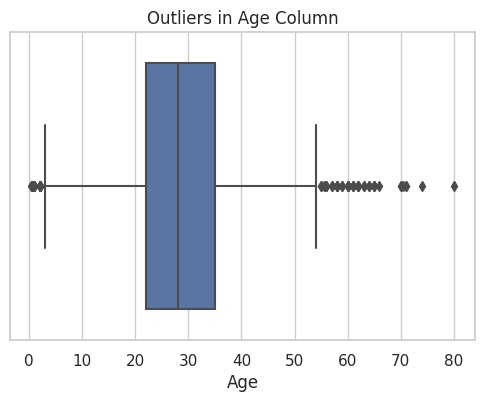

In [10]:
# Using a Boxplot

plt.figure(figsize=(6,4))
sns.boxplot(x= df['Age'])
plt.title("Outliers in Age Column")
plt.show()

In [11]:
# keep values within bounds

Q1_Age = df['Age'].quantile(0.25)
Q3_Age = df['Age'].quantile(0.75)
IQR = Q3_Age - Q1_Age

lower_bound = Q1_Age-1.5*IQR
upper_bound = Q3_Age+1.5*IQR

#Filter out Outliers
#df_no_outliers = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]
#print(df_no_outliers)

df_no_outliers = df[(df['Age']>= lower_bound) & (df['Age']>= upper_bound )]
print(df_no_outliers)


     PassengerId  Survived  Pclass  \
11            12         1       1   
15            16         1       2   
33            34         0       2   
54            55         0       1   
94            95         0       3   
96            97         0       1   
116          117         0       3   
152          153         0       3   
170          171         0       1   
174          175         0       1   
195          196         1       1   
232          233         0       2   
252          253         0       1   
268          269         1       1   
275          276         1       1   
280          281         0       3   
326          327         0       3   
366          367         1       1   
438          439         0       1   
456          457         0       1   
467          468         0       1   
483          484         1       3   
487          488         0       1   
492          493         0       1   
493          494         0       1   
545         

## Age Distribution of passangers

In [12]:
print( "Columns:",df.columns.to_list())

Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


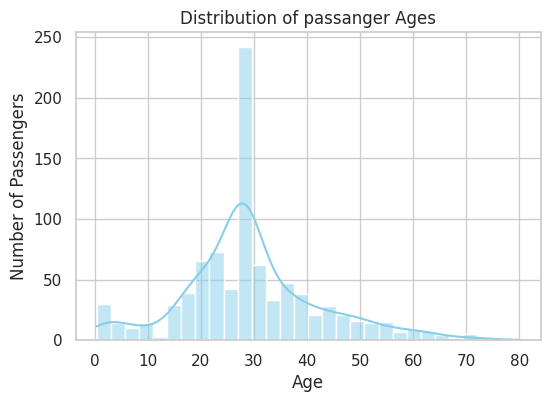

In [13]:
# Plot a histogram for this Distribution

plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of passanger Ages")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()

## Number of Passengers by Embarkation Point

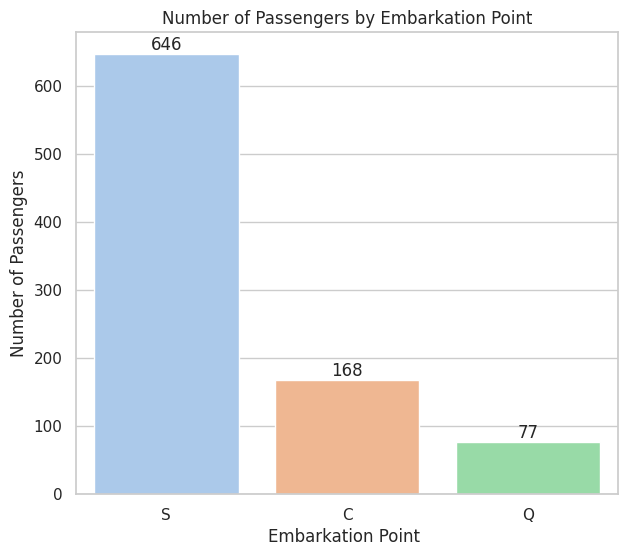

In [14]:
plt.figure(figsize=(7,6))
ax = sns.countplot(x='Embarked', data=df, palette="pastel")
# For data labels
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,   # x position (center of bar)
        height,                           # y position (top of bar)
        int(height),                      # the label (count)
        ha='center', va='bottom'          # center align, place above bar
    )
plt.title("Number of Passengers by Embarkation Point")
plt.xlabel("Embarkation Point ")
plt.ylabel("Number of Passengers")
plt.show()

## Ticket Prices Distribution

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


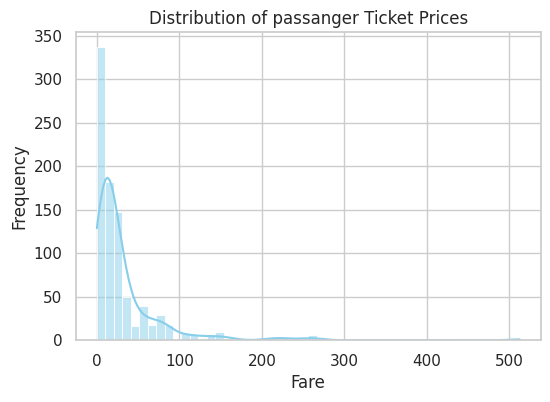

In [15]:
# Plot a Histogram

plt.figure(figsize=(6,4))
sns.histplot(df['Fare'], bins=50, kde=True, color="skyblue")
plt.title("Distribution of passanger Ticket Prices")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

# Bivariate Analysis

## Survived vs Pclass
 The social economic class most likely influenced survival.

Text(0.5, 1.0, 'Survival Rate by Passanger Economic Class')

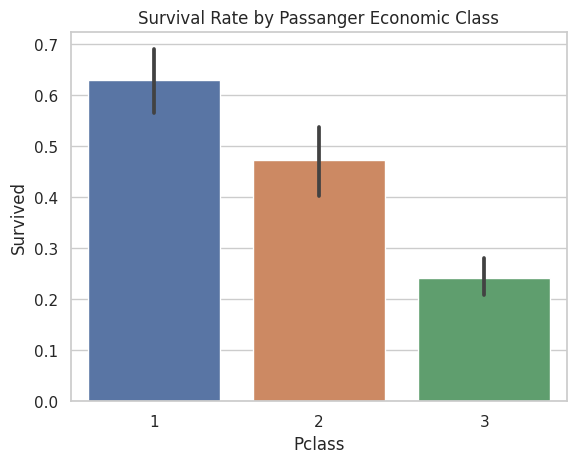

In [16]:
# Bar plot to show the survival rate per class

sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passanger Economic Class")

## Survived vs Sex
Testing 'Women and Children First' Policy

Text(0.5, 1.0, 'Survival Rate by Sex')

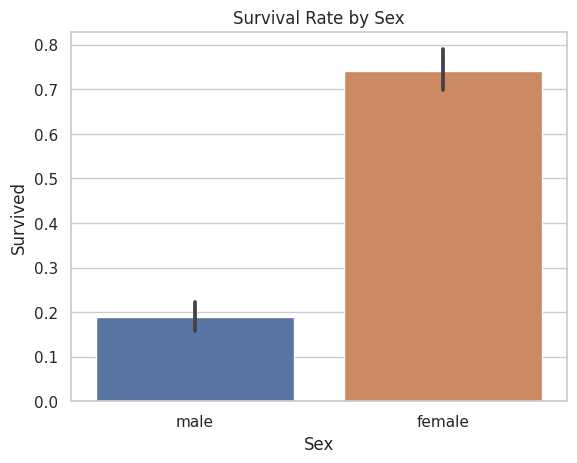

In [17]:
# Bar chart survival by Sex.
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Sex")

## Survived vs Age
Age might correlate strongly with survival, Let's find out.

/tmp/ipykernel_13/2685772471.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived', shade=True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_13/2685772471.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Did Not Survive', shade=True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operat

Text(0.5, 1.0, 'Age Distribution by Survival')

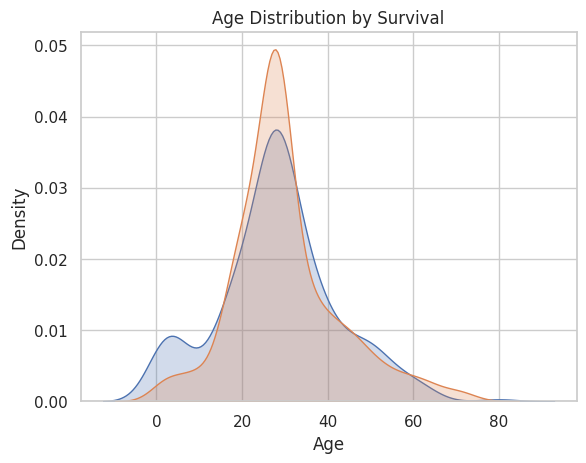

In [18]:
sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived', shade=True)
sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Did Not Survive', shade=True)
plt.title("Age Distribution by Survival")

## Fare vs Pclass
Fare and Economic class may be correlated.
Expensive Classes likely correlate to higher classes.

Text(0.5, 1.0, 'Fare Distribution by Class')

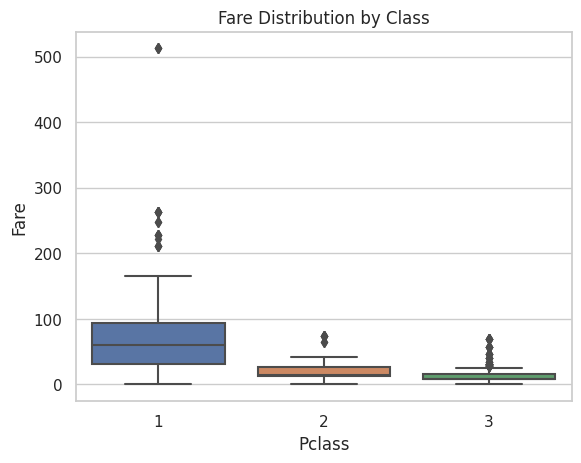

In [19]:
# Plot a boxplot
sns.boxplot(x= 'Pclass',y = 'Fare', data = df)
plt.title("Fare Distribution by Class")

## Embarked Vs Survived
Survival rates might vary by port of embarktion 

Text(0.5, 1.0, 'Survival Rate by Embarkation Port')

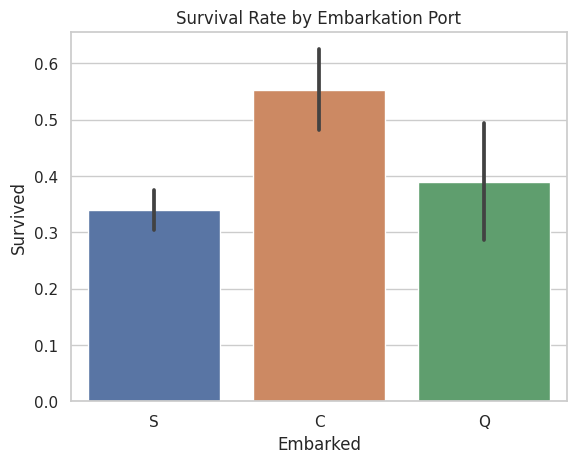

In [20]:
sns.barplot(x= 'Embarked', y= 'Survived', data= df)
plt.title("Survival Rate by Embarkation Port")

# Multivariate Analysis
From Multivariate Analysis we can uncover Interactions, combined effects of variables and discover the non obvious patterns between multiple Variables.

## How do Pclass, Age, and Fare jointly affect survival

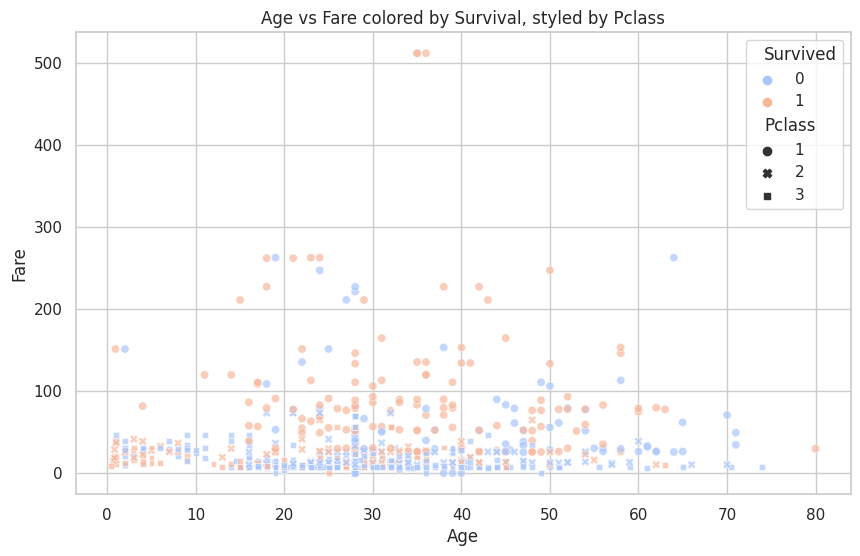

In [21]:
# Using a scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data= df,
    x ='Age', y = 'Fare',
    hue= 'Survived',
    style= 'Pclass',
    palette='coolwarm',
    alpha = 0.7
)
plt.title("Age vs Fare colored by Survival, styled by Pclass")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.05, 'Age vs Fare by Pclass and Survival')

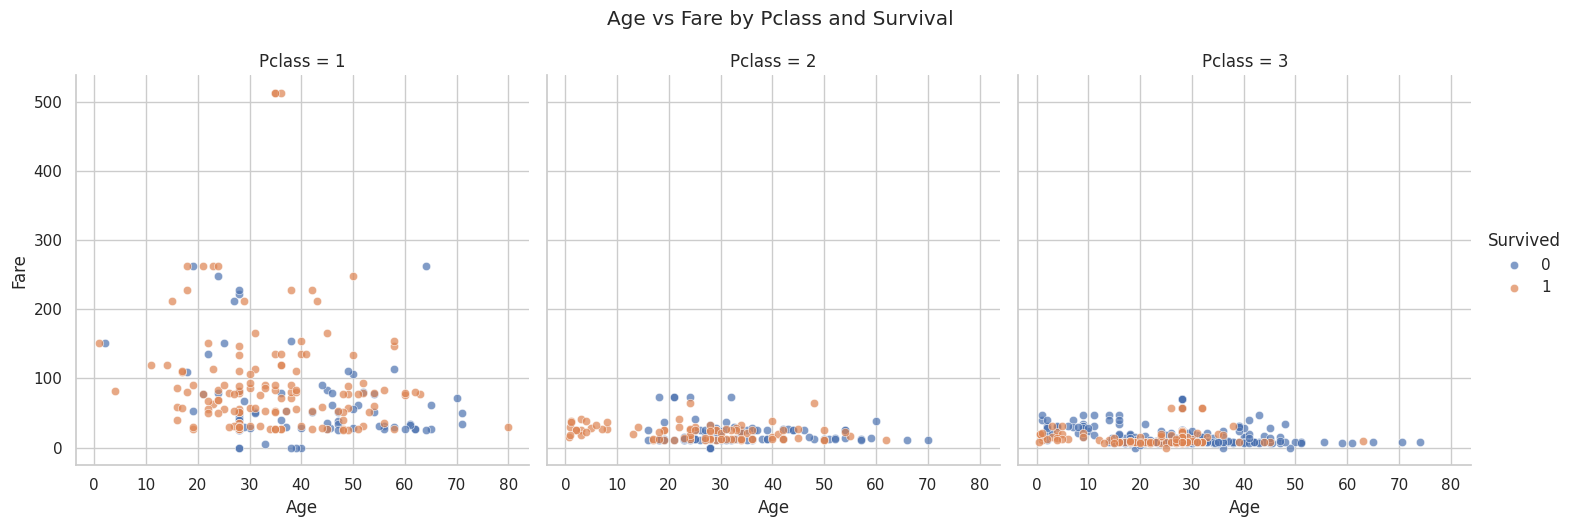

In [22]:
# To show whether survival differs within a Pclass based on age/fare combinations

g = sns.FacetGrid(df, col='Pclass', hue='Survived', height=5)
g.map(sns.scatterplot, 'Age', 'Fare', alpha=0.7)
g.add_legend()
g.fig.suptitle("Age vs Fare by Pclass and Survival", y=1.05)

In [23]:
# Fitting a logistic regaression model to see how these variables affect survival together
import statsmodels.api as sm

data = df[['Survived', 'Pclass', 'Age', 'Fare']].dropna()

# Add constant for intercept
X = sm.add_constant(data[['Pclass', 'Age', 'Fare']])
y = data['Survived']

model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.585524
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            3
Date:                Fri, 10 Oct 2025   Pseudo R-squ.:                  0.1207
Time:                        14:57:16   Log-Likelihood:                -521.70
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 7.519e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5909      0.425      6.095      0.000       1.758       3.424
Pclass        -0.9510      0.

## Are survival rates different for Embarked locations when considering Pclass
This is a conditional interaction analysis that is does Ebarked affect Survival differently depending on Pclass.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.05, 'Survival Counts by Embarked and Pclass')

<Figure size 1000x600 with 0 Axes>

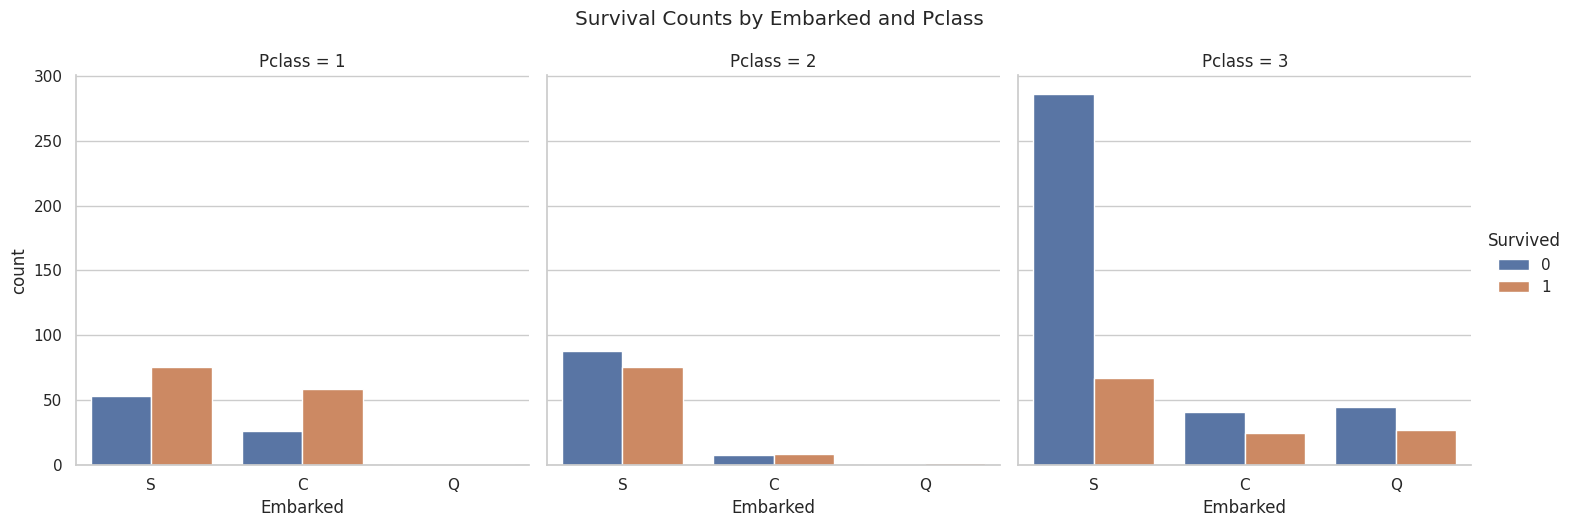

In [24]:
# Grouped Bar plot
plt.figure(figsize=(10, 6))
sns.catplot(
    x='Embarked',
    hue='Survived',
    col='Pclass',
    data=df,
    kind='count',
    height=5,
    aspect=1
)
plt.suptitle("Survival Counts by Embarked and Pclass", y=1.05)


# Detection and Handling Outliers 

In [25]:
# Getting Outliers for each Numeric column
#print( "Columns:",df.columns.to_list())
#df.dtypes
# Columns to check for and handle outliers('Age' and 'Fare' )

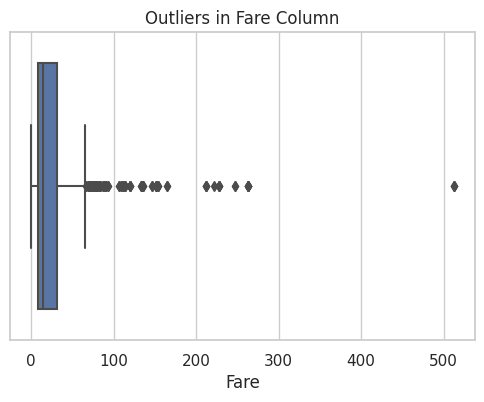

In [26]:
# plot a boxplot and Whisker chart for Fare column

plt.figure(figsize=(6,4))
sns.boxplot(x= df['Fare'])
plt.title("Outliers in Fare Column")
plt.show()

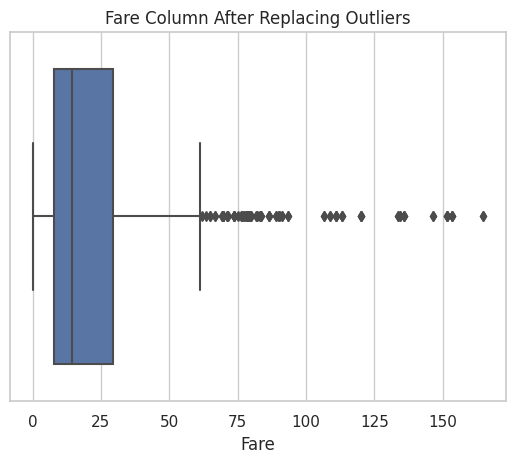

In [27]:
# Calculate mean of non-outlier fares (Fare ≤ 200)
fare_mean = df[df['Fare'] <= 200]['Fare'].mean()

# Replace outlier values (Fare > 200) with this mean
df['Fare'] = df['Fare'].apply(lambda x: fare_mean if x > 200 else x)

# Replot Boxplot
sns.boxplot(x=df['Fare'])
plt.title("Fare Column After Replacing Outliers")
plt.show()

We are going to leave the rest so as not to hide important insights for understanding passenger wealth.

# Target variable Exploration

## Distribution of Dependent variable (Survived) using countplots and bar plots

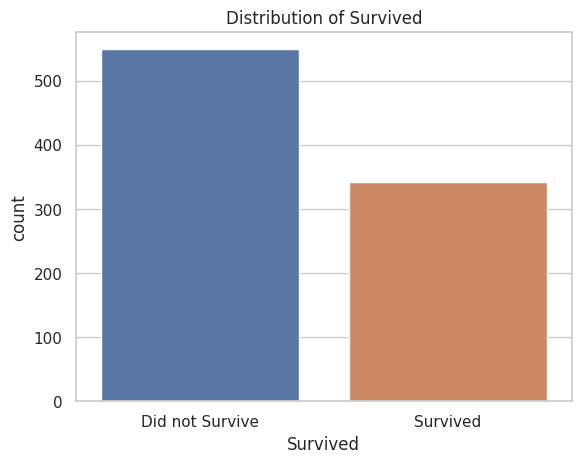

In [28]:
# Count plot of Survival
sns.countplot(x= 'Survived', data = df)
plt.title("Distribution of Survived")
plt.xticks([0, 1], ['Did not Survive','Survived'])
plt.show()

## How balanced or Imbalanced the dataset is
The classes Survived and Did not Survive is slightly imbalanced with (600 Did not Survive and 350 Survived)

## Interaction Effects

### Survival by Sex and Pclass

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.05, 'Survival by Class and Gender')

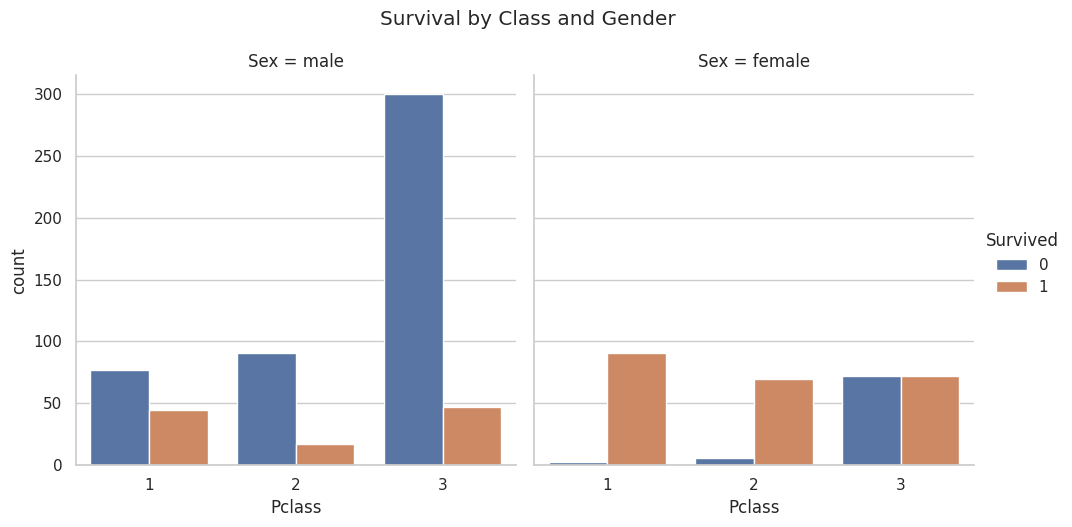

In [29]:
sns.catplot(x='Pclass', hue='Survived', col='Sex', kind='count', data=df)
plt.suptitle("Survival by Class and Gender", y=1.05)

### Survival by Age and Pclass

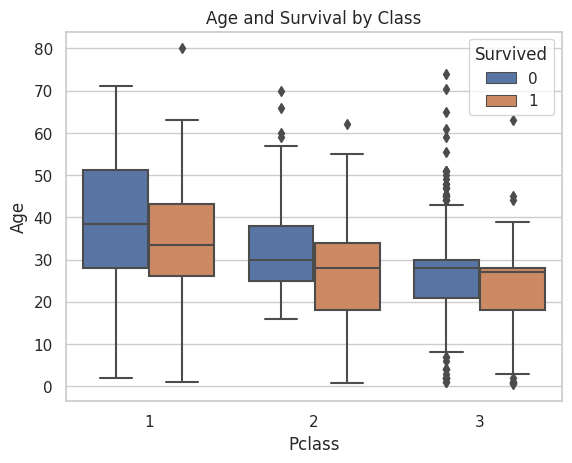

In [30]:
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)
plt.title("Age and Survival by Class")
plt.show()

### Survival by Pclass and Embarked

Text(0.5, 1.0, 'Survival Rate by Embarked and Pclass')

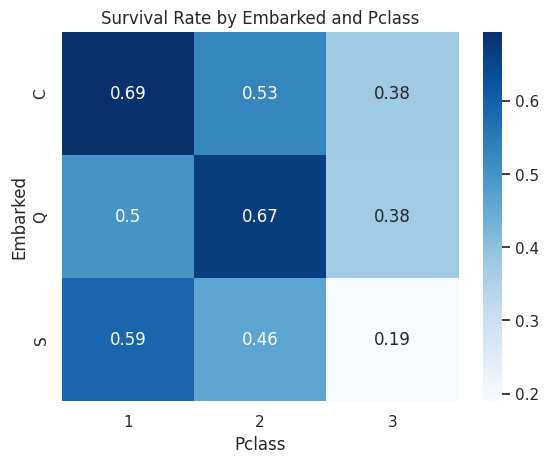

In [31]:
# Pivot survival rate by Pclass and Embarked
pivot = df.pivot_table(values='Survived', index='Embarked', columns='Pclass')
sns.heatmap(pivot, annot=True, cmap='Blues')
plt.title("Survival Rate by Embarked and Pclass")